<a href="https://colab.research.google.com/github/sahilposa/MalariaDetectModel/blob/main/_Malaria_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mount the Drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [2]:
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [3]:
path = '/content/drive/MyDrive/cell_images.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()
    


The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [4]:
train_dir = '/content/cell_images/train'
SIZE = 64

train_images = []
train_labels = []


for folder_name in ['/parasitized/', '/uninfected/']:
    images_path = os.listdir(train_dir + folder_name)
    for i, image_name in enumerate(images_path):
        try:
            image = Image.open(train_dir + folder_name + image_name)
            image = image.resize((SIZE, SIZE))
            train_images.append(np.array(image))
            if folder_name == '/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       
train_images = np.array(train_images)

train_labels = np.array(train_labels)



test_dir = '/content/cell_images/test'
SIZE = 64

test_images = []
test_labels = []

for folder_name in ['/parasitized/', '/uninfected/']:
    images_path = os.listdir(test_dir + folder_name)
    for i, image_name in enumerate(images_path):
        try:
            image = Image.open(test_dir + folder_name + image_name)
            image = image.resize((SIZE, SIZE))
            test_images.append(np.array(image))
            if folder_name == '/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       
test_images = np.array(test_images)

test_labels = np.array(test_labels)


###<b> Check the shape of train and test images

In [5]:
print("Shape of Training Images", train_images.shape)
print("Shape of Testing Images", test_images.shape)

Shape of Training Images (24958, 64, 64, 3)
Shape of Testing Images (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [6]:
print("Shape of Training Labels", train_labels.shape)
print("Shape of Testing Labels", test_labels.shape)

Shape of Training Labels (24958,)
Shape of Testing Labels (2600,)


####<b> Observations and insights: The shapes of the labels and images are matching, which is correct. The image sizes are also correct.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [7]:
print('Train image minimum pixel value:', np.min(train_images))
print('Train image maximum pixel value:', np.max(train_images))

print('Test image minimum pixel value:', np.min(test_images))
print('Test image maximum pixel value:', np.max(test_images))

Train image minimum pixel value: 0
Train image maximum pixel value: 255
Test image minimum pixel value: 0
Test image maximum pixel value: 255


####<b> Observations and insights: Both Test and Train images have the same min and max pixel values.



###<b> Count the number of values in both uninfected and parasitized 

In [8]:
train_df = pd.DataFrame(train_labels, columns = ['Cells'])
test_df = pd.DataFrame(test_labels, columns = ['Cells'])

uninfected_counts = train_df['Cells'].value_counts() + test_df['Cells'].value_counts()
parasitized_counts = train_df['Cells'].value_counts(1) + test_df['Cells'].value_counts(1)

print("Uninfected values count: ", uninfected_counts)
print("Parasitized values count: ", parasitized_counts)

Uninfected values count:  1    13882
0    13676
Name: Cells, dtype: int64
Parasitized values count:  1    1.004127
0    0.995873
Name: Cells, dtype: float64


###<b>Normalize the images

In [9]:
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

####<b> Observations and insights: _____

###<b> Plot to check if the data is balanced

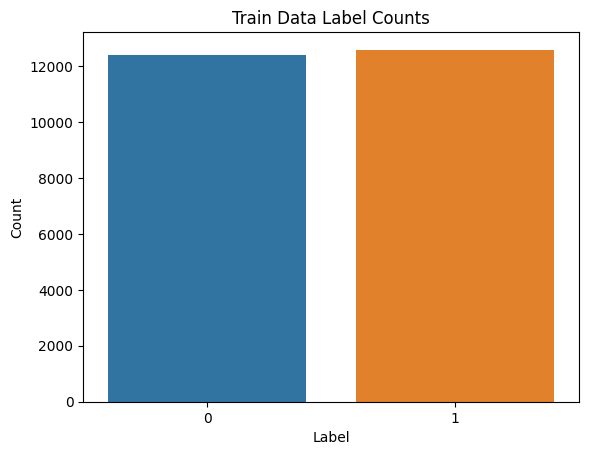

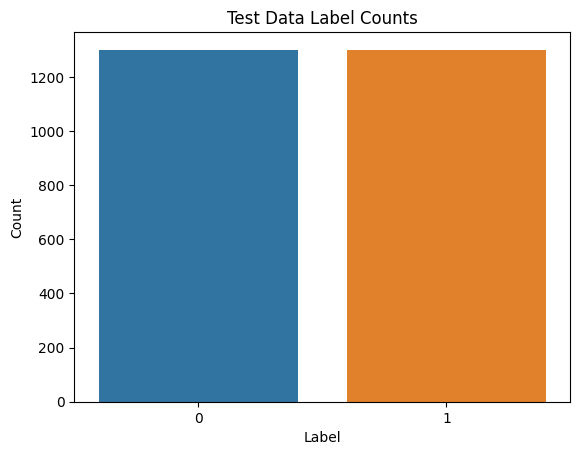

In [10]:
sns.countplot(x=train_labels)
plt.title("Train Data Label Counts")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Create a count plot for the test labels
sns.countplot(x=test_labels)
plt.title("Test Data Label Counts")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()






####<b> Observations and insights: The Data appears to be balanced


### <b>Data Exploration</b>
Let's visualize the images from the train data

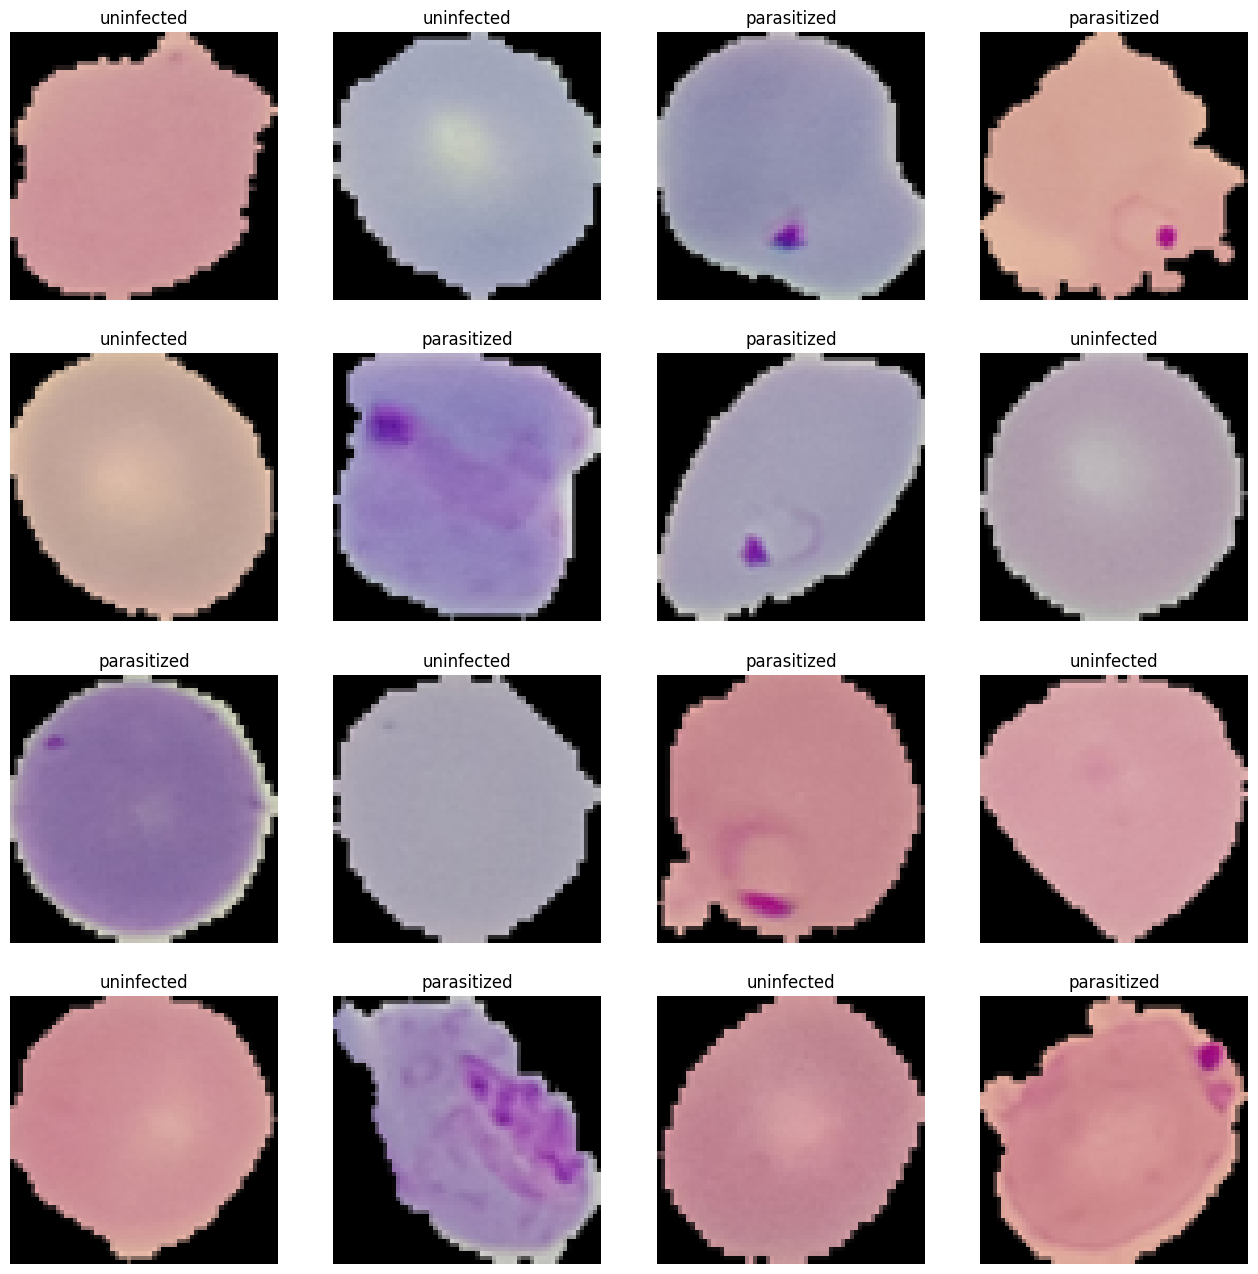

In [11]:
np.random.seed(42)
plt.figure(1, figsize = (16 , 16))
for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

####<b> Observations and insights: The uninfected cells are generally circular and opaque with no differences in color. However in the parasitized cells, there are differences in colors inside the cell and they are often distorted.

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

In [12]:
def find_mean_image(full_mat, title):
    mean_img = np.mean(full_mat, axis = 0)[0]
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

<b> Mean image for parasitized

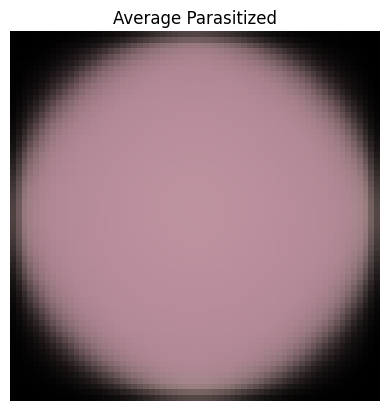

In [13]:
parasitized_data = [] 
for img, label in zip(train_images, train_labels):
        if label == 1:
              parasitized_data.append([img])          
parasitized_mean = find_mean_image(np.array(parasitized_data), 'Parasitized')

<b> Mean image for uninfected

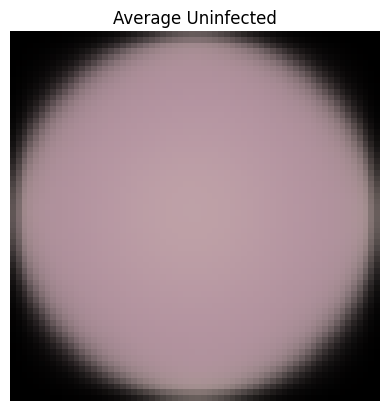

In [14]:
uninfected_data = [] 
for img, label in zip(train_images, train_labels):
        if label == 0:
              uninfected_data.append([img])          
uninfected_mean = find_mean_image(np.array(uninfected_data), 'Uninfected')




####<b> Observations and insights: The mean images don't seem to differ at all, with the parasitized image looking only slightly redder


### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

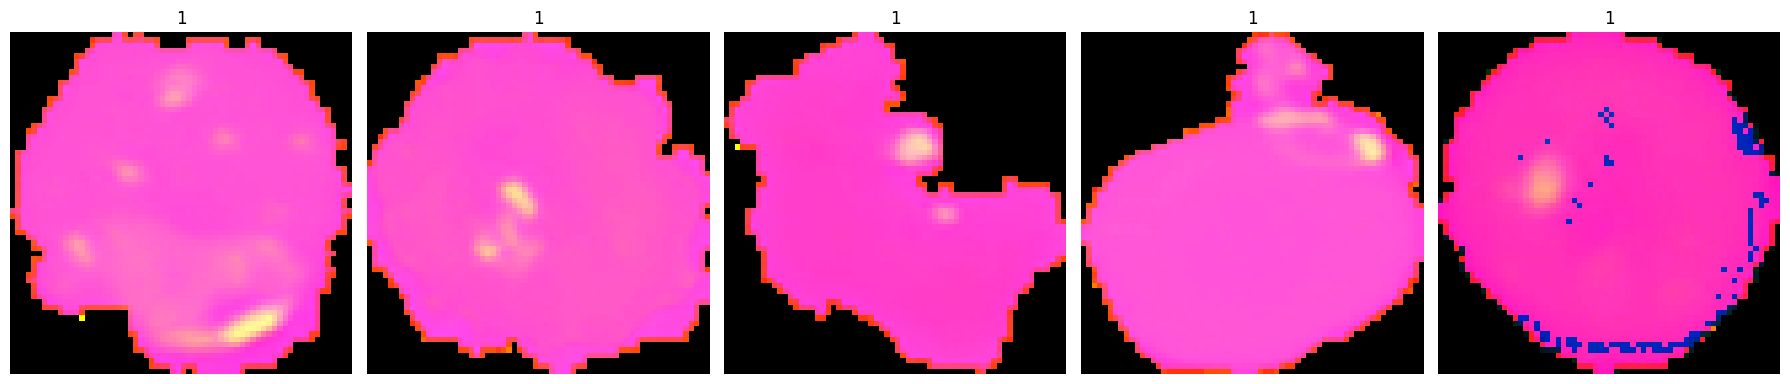

In [15]:
import cv2

gfx=[]

for i in np.arange(0, 100, 1):
  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  gfx.append(a)

gfx = np.array(gfx)
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
  Title = train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

###<b> Converting the test data

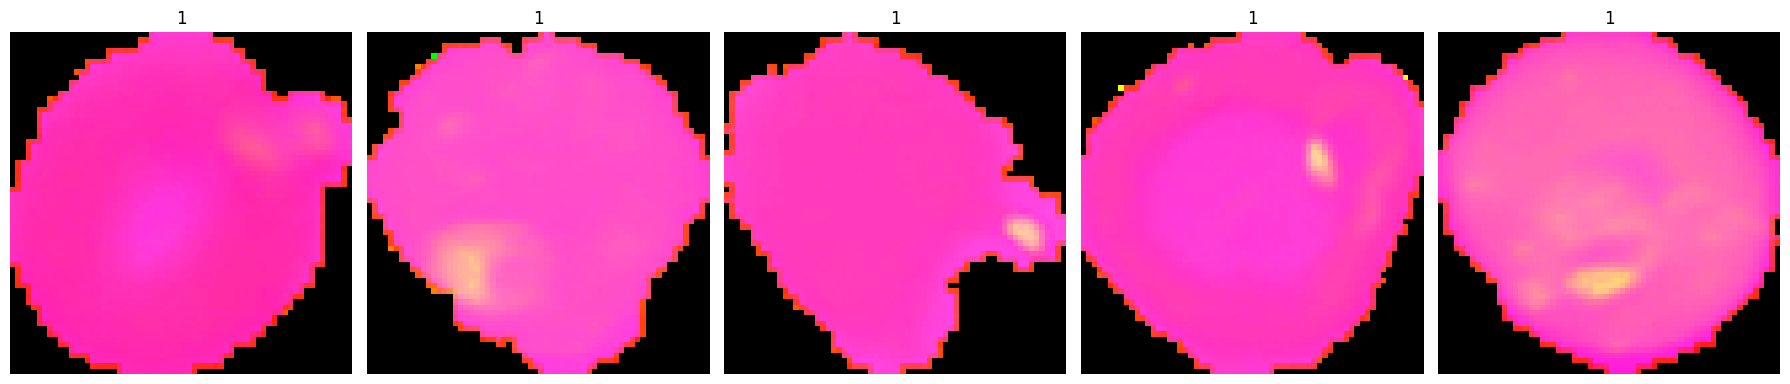

In [16]:
gfx=[]

for i in np.arange(0, 100, 1):
  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  gfx.append(a)

gfx = np.array(gfx)
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
  Title = train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b>Observations and insights: The training images look very spherical and is the only one to exhibit blue inside the cells, whereas the test data has some non-spherical images and no blues, only pinks and yellows.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

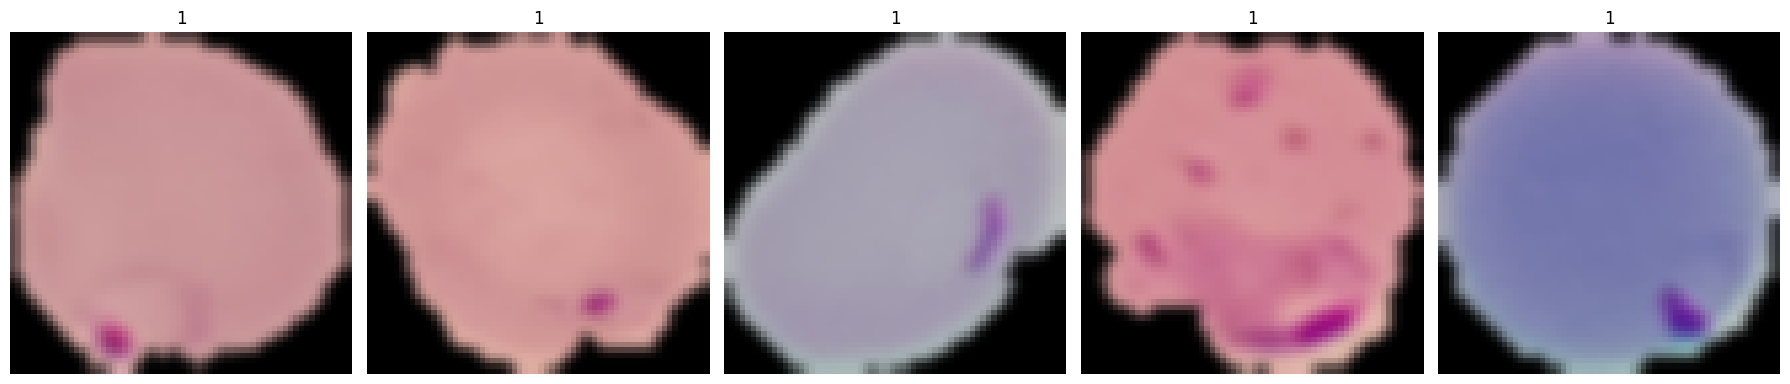

In [17]:
gbx = []  

for i in np.arange(0, 100, 1):
  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)

gbx = np.array(gbx)
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
  Title = train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

###<b> Gaussian Blurring on test data

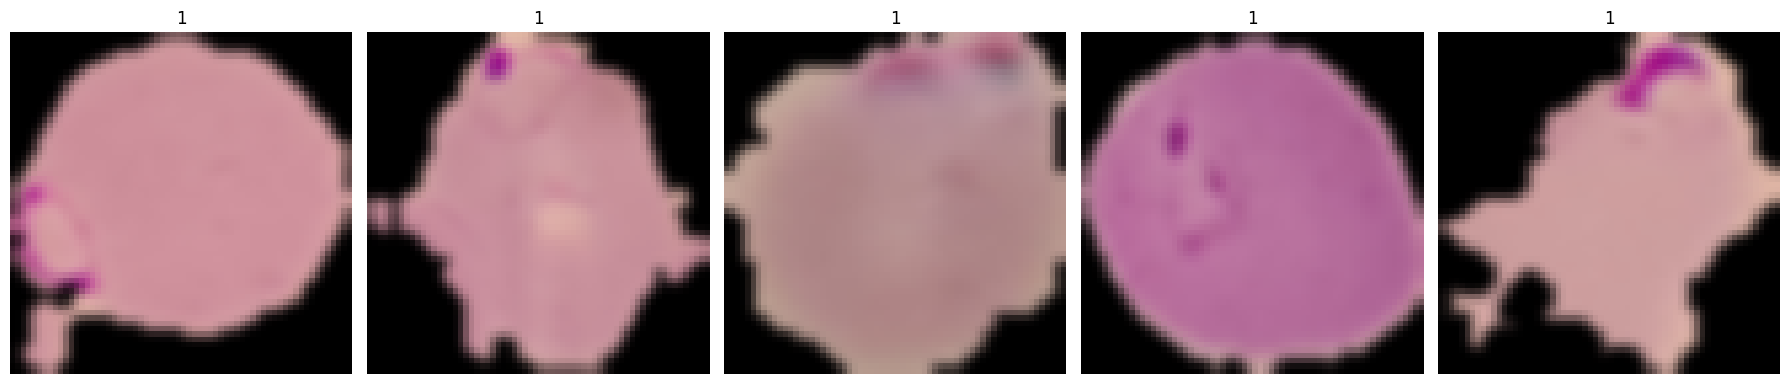

In [18]:
gbx = []  

for i in np.arange(0, 100, 1):
  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx.append(b)

gbx = np.array(gbx)
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
  Title = train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####**Observations and insights: The Gaussian Blur appears to make the images of the cells in both the train and test data much more visible and with more discernable detail. It seems to be helpful to blur here. Some other techniques that we could do could be things such as Noise Reduction or Contrast enhancement to make these details seen here more visible and clear.**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [19]:
import tensorflow as tf

from tensorflow.keras import backend, optimizers, Model

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, LeakyReLU

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg16 import VGG16

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

####<B>One Hot Encoding the train and test labels

In [20]:
train_labels = to_categorical(train_labels, 2)

test_labels = to_categorical(test_labels, 2)

###<b> Building the model

In [21]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation = "softmax"))  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [22]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [23]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 123s 194ms/step - loss: 0.3728 - accuracy: 0.8279 - val_loss: 0.3105 - val_accuracy: 0.8896
Epoch 2/20
624/624 [==============================] - 117s 188ms/step - loss: 0.1257 - accuracy: 0.9540 - val_loss: 0.3222 - val_accuracy: 0.9377
Epoch 3/20
624/624 [==============================] - 112s 180ms/step - loss: 0.1021 - accuracy: 0.9682 - val_loss: 0.0821 - val_accuracy: 0.9918
Epoch 4/20
624/624 [==============================] - 123s 197ms/step - loss: 0.0852 - accuracy: 0.9730 - val_loss: 0.0937 - val_accuracy: 0.9860
Epoch 5/20
350/624 [===============>..............] - ETA: 47s - loss: 0.0749 - accuracy: 0.9764

###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

<b> Plotting the confusion matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred))


cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

In [ ]:
def plot_TVaccuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

plot_TVaccuracy(history)

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session()

###<b> Building the Model

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.3))

model1.add(Flatten())
model1.add(Dense(512, activation = "relu"))
model1.add(Dropout(0.4))
model1.add(Dense(2, activation = "softmax"))  

model1.summary()

###<b> Compiling the model

In [ ]:
model1.compile(loss = "categorical_crossentropy", 
               optimizer = "adam", 
               metrics = ["accuracy"])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])


<b> Plotting the confusion matrix

In [ ]:
pred = model1.predict(test_images)
pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred))


cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the train and the validation curves

In [ ]:
plot_TVaccuracy(history1)

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session()

###<b> Building the Model

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))

model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dropout(0.5))

model2.add(Dense(2, activation='softmax'))

adam = optimizers.Adam(learning_rate=0.001)

model2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

<b>Plotting the train and validation accuracy

In [ ]:
plot_TVaccuracy(history2)

###<b>Evaluating the model

In [ ]:
accuracy2 = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2[1])

####<b>Observations and insights: This model has performed slightly poorer compared to the model without Batch Normalization by about 4%.

<b> Generate the classification report and confusion matrix 

In [ ]:
pred = model2.predict(test_images)
pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred))


cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session()

###<b> Use image data generator

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)

val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

In [ ]:
images, labels = next(train_generator)

fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

####<b>Observations and insights: The Cells all seem much more distorted but it can be seen that parasitized cells have irregularities inside of them where uninfected cells do not.

###<b>Building the Model

In [ ]:
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.3))

model3.add(Flatten())
model3.add(Dense(512, activation = "relu"))
model3.add(Dropout(0.4))
model3.add(Dense(2, activation = "softmax"))  

adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

###<B>Evaluating the model

<b>Plot the train and validation accuracy

In [ ]:
plot_TVaccuracy(history3)

accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

<B>Plotting the classification report and confusion matrix

In [ ]:
pred = model3.predict(test_images)
pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred))


cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
backend.clear_session()

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

x = Flatten()(transfer_layer.output)  
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) 

###<b>Compiling the model

In [ ]:
adam = optimizers.Adam(learning_rate = 0.001)

model4.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history4 = model4.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 10, verbose = 1)

<b>Plot the train and validation accuracy

In [ ]:
plot_TVaccuracy(history4)

###**Observations and insights: The training curve is very stable, but the validation curve is relatively erratic over the epochs.**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [ ]:
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])

<b>Plotting the classification report and confusion matrix

In [ ]:
pred = model4.predict(test_images)
pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred))


cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: The model with the most accuracy was model1 where simply another layer made a few tenths of a percentage point of difference. This should be marked as the final model. From the confusion matrices and classification reports we can see the metrics of the models as well as how effectively the model could predict whether or not a cell was parasitized or uninfected.



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture? <b> Model performance could be improved by adding more layers to the model to fine tune it, but this could risk overfitting the model, so do so with caution </b>
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

<b>One of the more meaningful insights on the data is that we can see how the cells appear when parasitized and train the model to predict when faced with pictures of said parasitized cells. Perhaps we can use this for other aspects of medicine regarding parasites that distort human cells outside of malaria.</b>

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

<b>Some techniques perform better than others, with the best model currently being one where only a layer or two was added, without data augmentation or batch normalization. However, there is potential for the data augmented and/or batch normalized models could be altered for better performance.</b>

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

<b> Currently the best model to be adopted should be model3 because it performed the most effectively at predicting the types of cells and had the highest accuracy. </b>

Model: 0.9823076725006104

Model1: 0.9807692170143127

Model2: 0.9819231033325195

Model3: 0.9842307567596436

Model4: 0.9484615325927734




####**Executive Summary**:
Malaria is a deadly parasitic disease that affects millions of people worldwide and causes the loss of countless lives. To combat this, we must first find the most optimal ways to identify when a person has malaria, one of the ways being to obtain images of the cells belonging to patients and identifying whether they are parasitized. This is the main focus of these models, with the primary goal of being able to identify the differences between parasitized and uninfected cells for diagnoses. If this is a success, this could heavily revolutionize how quickly we can treat patients after identifying their infections.

To begin, a series of experiments regarding various different models was conducted on the same dataset, each with varying results. Of these models, model 3 with Data Augmentation is the best option to be adopted as it has the highest accuracy score. There is also the potential for even higher scores with more layers for Deep Learning algorithms, however this should be done with caution as this could risk overfitting the model. 

However, more computing power may be needed to apply this model on a wider scale, as time constraints can pose and issue with the model processing the training and testing data on larger scales. Shareholders moving for adopting this model and using it in the fight against Malaria should find this needed computing power.